In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(8.0,5.0)
plt.rcParams['font.family']=['sans-serif']
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
dfr=pd.read_clipboard()
#取源数据
dfr

,序号,城市名称,平均单价（元/㎡）,环比,同比
0,1,深圳,"78,722",+2.61%,+20.44%
1,2,北京,"63,554",-0.82%,-1.2%
2,3,上海,"58,831",+0.4%,+9.7%
3,4,厦门,"48,169",-0.61%,+9.52%
4,5,广州,"38,351",-1.64%,+13.79%
5,6,三亚,"35,981",-0.19%,-3.88%
6,7,南京,"33,301",+1.59%,+8.02%
7,8,杭州,"32,181",+3.11%,+4.61%
8,9,天津,"26,397",+2.34%,+3.5%
9,10,福州,"25,665",-1.05%,-4.1%


In [8]:
#查看数据类型
dfr.dtypes

序号            int64
城市名称         object
平均单价（元/㎡）    object
dtype: object

In [3]:
#数据提取、类型转换
df=(
    #去掉千分位并转为整形
    dfr
    .assign(平均单价=dfr['平均单价（元/㎡）'].str.replace(',','').astype(int))
    #去百分号并转为浮点型
    .assign(同比=dfr.同比.str[:-1].astype(float))
    .assign(环比=dfr.环比.str[:-1].astype(float))
    .loc[:,['城市名称','平均单价','同比','环比']]
    
)
df

,城市名称,平均单价,同比,环比
0,深圳,78722,20.44,2.61
1,北京,63554,-1.20,-0.82
2,上海,58831,9.70,0.40
3,厦门,48169,9.52,-0.61
4,广州,38351,13.79,-1.64
5,三亚,35981,-3.88,-0.19
6,南京,33301,8.02,1.59
7,杭州,32181,4.61,3.11
8,天津,26397,3.50,2.34
9,福州,25665,-4.10,-1.05


<AxesSubplot:xlabel='城市名称'>

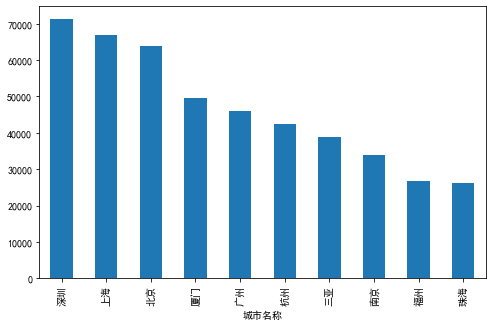

In [16]:
#查看均价差异
(
    df.set_index('城市名称')
    .平均单价
    .plot
    .bar()
)

<AxesSubplot:xlabel='城市名称'>

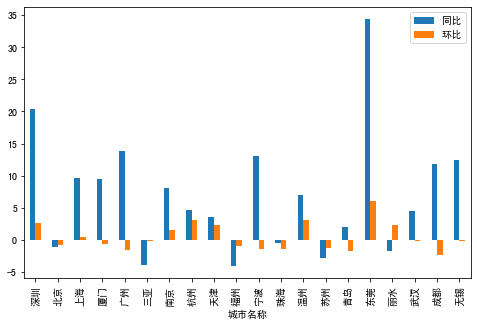

In [5]:
#查看同比和环比情况
(
    df.set_index('城市名称')
    .loc[:,['同比','环比']]
    .plot
    .bar()
)

In [19]:
#极值标注
(
    df.style
    .highlight_max(color='red',subset=['同比','环比'])
    .highlight_min(color='green',subset=['同比','环比'])
    .format({'平均单价':'{:,.0f}'})
    .format({'同比':'{:2}%'})
    .format({'环比':'{:2}%'})
)

,城市名称,平均单价,同比,环比
0,深圳,"78,722",20.44%,2.61%
1,北京,"63,554",-1.2%,-0.82%
2,上海,"58,831",9.7%,0.4%
3,厦门,"48,169",9.52%,-0.61%
4,广州,"38,351",13.79%,-1.64%
5,三亚,"35,981",-3.88%,-0.19%
6,南京,"33,301",8.02%,1.59%
7,杭州,"32,181",4.61%,3.11%
8,天津,"26,397",3.5%,2.34%
9,福州,"25,665",-4.1%,-1.05%


In [21]:
#绘制单价条形图
(
    df.style
    .bar(subset='平均单价',color='yellow')
)

,城市名称,平均单价,同比,环比
0,深圳,78722,20.440000,2.610000
1,北京,63554,-1.200000,-0.820000
2,上海,58831,9.700000,0.400000
3,厦门,48169,9.520000,-0.610000
4,广州,38351,13.790000,-1.640000
5,三亚,35981,-3.880000,-0.190000
6,南京,33301,8.020000,1.590000
7,杭州,32181,4.610000,3.110000
8,天津,26397,3.500000,2.340000
9,福州,25665,-4.100000,-1.050000


In [31]:
#综合可视化
(
    df.style
    .background_gradient(subset=['平均单价'],cmap='BuGn')
    .format({'同比':'{:2}%','环比':'{:2}%'})
    .bar(subset=['同比'],
         color=['#ffe4e4','#bbf9ce'],#上升、下降的颜色
         vmin=0,vmax=15, #范围定为以0位基准的上下15
         align='zero'
    )
    .bar(subset=['环比'],
         color=['red','green'],
         vmin=0,vmax=11,
         align='zero'
    )
)

,城市名称,平均单价,同比,环比
0,深圳,78722,20.44%,2.61%
1,北京,63554,-1.2%,-0.82%
2,上海,58831,9.7%,0.4%
3,厦门,48169,9.52%,-0.61%
4,广州,38351,13.79%,-1.64%
5,三亚,35981,-3.88%,-0.19%
6,南京,33301,8.02%,1.59%
7,杭州,32181,4.61%,3.11%
8,天津,26397,3.5%,2.34%
9,福州,25665,-4.1%,-1.05%
